<a href="https://colab.research.google.com/github/Rickmwasofficial/Learning-Machine-Learning/blob/main/Bulldozer_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## DownLoad the Data

!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip # download files from GitHub as zip

import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()

--2024-06-28 12:42:59--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2024-06-28 12:42:59--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72077822 (69M) [application/zip]
Saving to: ‘bluebook-for-bulldozers.zip’

bluebook-for-bulldo 100%[===================>]  68.74M   201MB/s    in 0.3s    

2024-06-28 12:43:01 (201

# **Predicting the price of bulldozers based on a number of features**

The data is sourced from auction result postings and includes information on usage and equipment configurations.

https://www.kaggle.com/c/bluebook-for-bulldozers

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

In [2]:
# prepare nescessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Get the data
df = pd.read_csv('/content/bluebook-for-bulldozers/TrainAndValid.csv')
df.head()

<ipython-input-3-734b17bb651d>:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/bluebook-for-bulldozers/TrainAndValid.csv')


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


Text(0.5, 0, 'Sale Price')

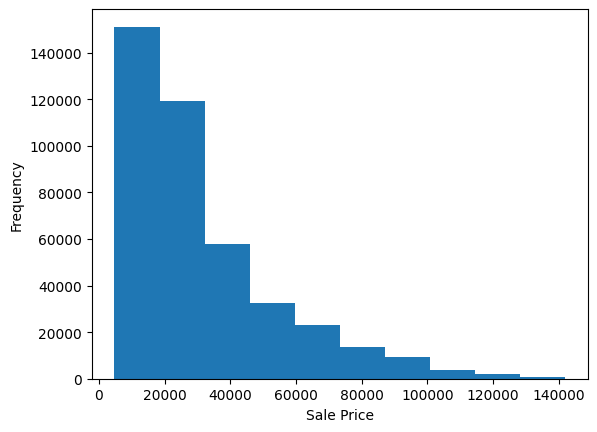

In [5]:
df.SalePrice.plot(kind='hist');
plt.xlabel('Sale Price')

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
def convert_to_datetime(df, column):
  df[column] = pd.to_datetime(df[column])
  df["day"] = df[column].dt.day
  df["month"] = df[column].dt.month
  df["year"] = df[column].dt.year
  df.drop(column, axis=1, inplace=True)

convert_to_datetime(df, "saledate")

In [9]:
def fill_missing(df):
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label] = content.fillna(content.median())
        df[f"{label}_is_missing"] = pd.isnull(content).astype(int)

fill_missing(df)

In [10]:
def convert_to_cat(df):
  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      print(label)
      df[label] = pd.Categorical(content).codes + 1
      df[f"{label}_is_missing"] = pd.isnull(content).astype(int)

convert_to_cat(df)
df.info()

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: float64(3), int16(5), int32(3), int64(51), int8(39)
memory usage: 194.0 MB


In [11]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2,963,...,1,1,1,1,1,1,1,1,0,0
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2,1745,...,1,1,1,1,1,1,1,1,0,0
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,336,...,1,1,1,1,1,1,1,1,1,1
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,3716,...,1,1,1,1,1,1,1,1,1,1
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,3,4261,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,0.0,0,490,...,0,0,0,0,0,1,1,1,1,1
412694,6333345,10500.0,1882122,21436,149,2.0,2005,0.0,0,491,...,0,0,0,0,0,1,1,1,1,1
412695,6333347,12500.0,1944213,21435,149,2.0,2005,0.0,0,490,...,0,0,0,0,0,1,1,1,1,1
412696,6333348,10000.0,1794518,21435,149,2.0,2006,0.0,0,490,...,0,0,0,0,0,1,1,1,1,1


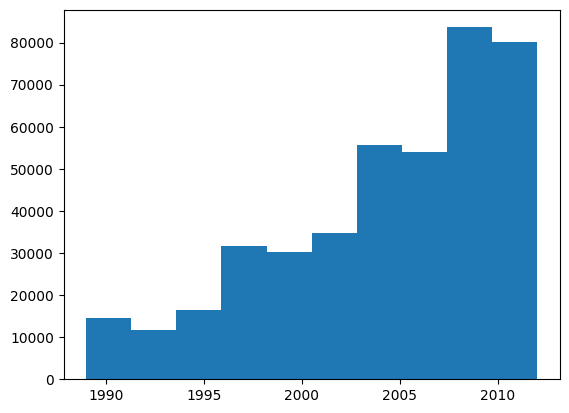

In [12]:
plt.hist(df.year);

In [13]:
# Split data to a validation set
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,999089,3157,121,3.0,2004,68.0,2,963,298,...,1,1,1,1,1,1,1,1,0,0
1,1139248,117657,77,121,3.0,1996,4640.0,2,1745,529,...,1,1,1,1,1,1,1,1,0,0
2,1139249,434808,7009,121,3.0,2001,2838.0,1,336,111,...,1,1,1,1,1,1,1,1,1,1
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3716,1381,...,1,1,1,1,1,1,1,1,1,1
4,1139253,1057373,17311,121,3.0,2007,722.0,3,4261,1538,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,1919201,21435,149,2.0,2005,0.0,0,490,160,...,0,0,0,0,0,1,1,1,1,1
412694,6333345,1882122,21436,149,2.0,2005,0.0,0,491,160,...,0,0,0,0,0,1,1,1,1,1
412695,6333347,1944213,21435,149,2.0,2005,0.0,0,490,160,...,0,0,0,0,0,1,1,1,1,1
412696,6333348,1794518,21435,149,2.0,2006,0.0,0,490,160,...,0,0,0,0,0,1,1,1,1,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [15]:
# work with a smaller dataset to test the models first
X_train = X_train[:10000]
y_train = y_train[:10000]
X_val = X_val[:1000]
y_val = y_val[:1000]

from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model2 = SGDRegressor(random_state=42)
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [16]:
def score_model(model):
  train_pred = model.predict(X_train)
  val_pred = model.predict(X_val)
  return model.score(X_train, y_train)


In [17]:
score_model(model)

0.9736042069396722

In [18]:
score_model(model2)

-2.772522750726992e+33

In [19]:
model2.score(X_train, y_train)

-2.772522750726992e+33

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(10, 1000, 10),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False]
}

rs_model = RandomizedSearchCV(model,
                              param_dist,
                              n_iter=20,
                              cv=5,
                              verbose=2,
                              random_state=42)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=550; total time=   5.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=550; total time=   7.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=550; total time=   6.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=550; total time=   5.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=550; total time=   8.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=690; total time=   6.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=690;

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   random_state=42, verbose=2)

In [ ]:
rs_model.best_params_

{'n_estimators': 750,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [ ]:
rs_model.score(X_train, y_train)

0.9584392267649777

In [ ]:
model.score(X_train, y_train)

0.9743485963083381

In [ ]:
model.score(X_val, y_val), rs_model.score(X_val, y_val)

(0.8293490250049353, 0.8146272060129779)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_dist = {
    'n_estimators': np.arange(10, 510, 100),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(30, 50, 10)),
    'min_samples_split': np.arange(6, 9),
    'min_samples_leaf': np.arange(1, 3),
    'bootstrap': [True, False]
}


gs_model = GridSearchCV(model,
                        param_dist,
                        cv=3,
                        n_jobs=-1, verbose=2, scoring='r2')
gs_model.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 30, 40],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2]),
                         'min_samples_split': array([6, 7, 8]),
                         'n_estimators': array([ 10, 110, 210, 310, 410])},
             scoring='r2', verbose=2)

In [38]:
from sklearn.metrics import mean_squared_log_error
import math

def evaluate(model, data, price):
  val_msle = math.sqrt(mean_squared_log_error(y_val, model.predict(X_val)))
  result = {
      "SalesID": [],
      "SalePrice": []
  }
  for i in data.SalesID:
    for j in price.SalePrice:
      result["SalesID"].append(i)
      result["SalePrice"].append(j)
  result = pd.DataFrame(result)
  return result


In [ ]:
gs_model.best_params_

In [ ]:
evaluate(gs_model)

In [ ]:
evaluate(rs_model)

In [37]:
y_val

251334    21500.0
258032     9000.0
261359     9500.0
382248    24000.0
129140    23000.0
           ...   
245351    53000.0
352288    29000.0
325140    57500.0
348475     9000.0
97423     29000.0
Name: SalePrice, Length: 1000, dtype: float64

In [39]:
evaluate(model, X_val, y_val)

AttributeError: 'Series' object has no attribute 'SalePrice'

In [ ]:
# Put everything together
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/content/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)
df2 = pd.read_csv('/content/bluebook-for-bulldozers/Test.csv', low_memory=False)

def convert_to_datetime(df, column):
  df[column] = pd.to_datetime(df[column])
  df["day"] = df[column].dt.day
  df["month"] = df[column].dt.month
  df["year"] = df[column].dt.year
  df.drop(column, axis=1, inplace=True)

convert_to_datetime(df, "saledate")
convert_to_datetime(df2, "saledate")

def fill_missing(df):
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label] = content.fillna(content.median())
        df[f"{label}_is_missing"] = pd.isnull(content).astype(int)

fill_missing(df)
fill_missing(df2)

def convert_to_cat(df):
  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      print(label)
      df[label] = pd.Categorical(content).codes + 1
      df[f"{label}_is_missing"] = pd.isnull(content).astype(int)

convert_to_cat(df)
convert_to_cat(df2)

# Align test set columns with training set
missing_cols = set(X.columns) - set(df2.columns)
for col in missing_cols:
    df2[col] = 0

df2 = df2[X.columns]

# Split data to a validation set
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
df2['auctioneerID_is_missing'] = 0
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

import math

def evaluate(model, test):
  val_msle = math.sqrt(mean_squared_log_error(y_val, model.predict(X_val)))
  result = {
      "SalesID": [],
      "SalePrice": []
  }
  print(val_msle)
  for i in test.SalesID:
    result["SalesID"].append(i)
    result["SalePrice"].append(model.predict(test))
  result = pd.DataFrame(result)
  result.to_csv('output.csv', index=False)

evaluate(model, df2)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriag

In [ ]:
df2.head()

In [ ]:
X.head()